In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 81)

data_set = pd.read_csv(r'E:\ThisPC\Desktop\2019 Fall\CS 4661\Data-Science-master\Data-Science-master\Supplemental Files\House_Prices.csv')
print(data_set.head())

# Our Data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_data_set = data_set.select_dtypes(include=numerics)
print(new_data_set.head())

#new_data_set = new_data_set.loc[:, new_data_set.columns != 'SalePrice']
#print(new_data_set.head())

#print(X.size)
#print(y.size)

#This is following the video https://www.youtube.com/watch?v=ro5ftxuD6is

# Example Data
X = ([1,3,5,7,8,15,11,13])
y = ([1,2,3,4,5,6,7,8])

from scipy.interpolate import *
p1 = np.polyfit(X,y,1)


import operator
import matplotlib.pyplot as plt
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y), key=sort_axis)
x, y = zip(*sorted_zip)
plt.plot(X, y, color='y')
plt.show()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

<Figure size 640x480 with 1 Axes>

[0.46441948 0.84269663]


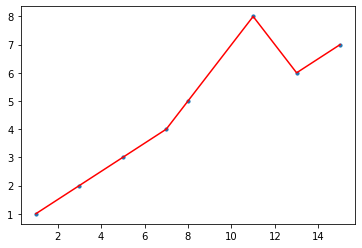

In [2]:
# Lining through every point
from numpy import *

from scipy.interpolate import *
p1 = polyfit(X,y,1)
print(p1)


import operator
import matplotlib.pyplot as plt
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y), key=sort_axis)
X, y = zip(*sorted_zip)
plt.plot(X, y, color='r')
plt.show()

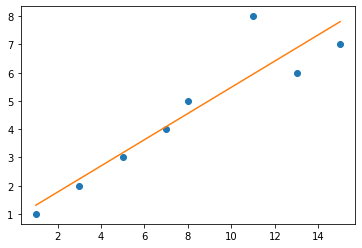

In [3]:
# Polynomial Agression but now only in linear form
plt.plot(X,y,'o')
plt.plot(X,polyval(p1,X))

In [4]:
# Quadractic fit and Poly fit
p2 = polyfit(X,y,2)
p3 = polyfit(X,y,3)
p4 = polyfit(X,y,4)
p5 = polyfit(X,y,5)
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)

[0.46441948 0.84269663]
[-0.02410788  0.85301691 -0.2195672 ]
[-0.00578072  0.11310205 -0.01697351  0.97673826]
[ 3.17492706e-04 -1.60137068e-02  2.20667124e-01 -4.20335675e-01
  1.34833416e+00]
[ 7.39449091e-04 -2.90071636e-02  4.01595332e-01 -2.34400470e+00
  5.92993316e+00 -3.02730426e+00]


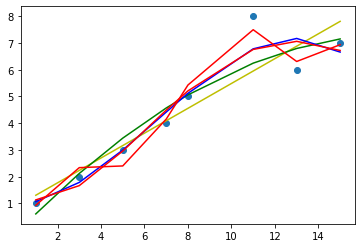

In [5]:
# Polynomial Agression 
plt.plot(X,y,'o')
plt.plot(X,polyval(p1,X), color='y') # Linear
plt.plot(X,polyval(p2,X), color='g') # Quadratic
plt.plot(X,polyval(p3,X), color='b') # Polynomial
plt.plot(X,polyval(p4,X), color='r') # Polynomial
plt.plot(X,polyval(p5,X), color='r') # Polynomial

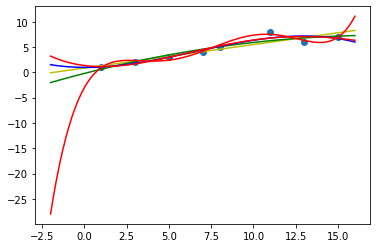

In [6]:
# Polynomial Agression Smoother using linspace()
plt.plot(X,y,'o')
Xp = linspace(-2,16,100)
plt.plot(Xp,polyval(p1,Xp), color='y') # Linear
plt.plot(Xp,polyval(p2,Xp), color='g') # Quadratic
plt.plot(Xp,polyval(p3,Xp), color='b') # Polynomial
plt.plot(Xp,polyval(p4,Xp), color='r') # Polynomial
plt.plot(Xp,polyval(p5,Xp), color='r') # Polynomial

5555.555555555556
639
639


C:\Users\Jonathan Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


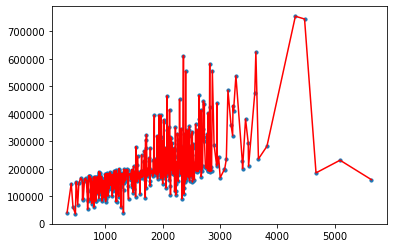

[6.87757655e+01 7.73522407e+04]
[-3.79094454e-03  8.42420435e+01  6.37670880e+04]
[-8.21999572e-06  5.99706125e-02 -5.49418204e+01  1.47454768e+05]
[-6.77495590e-09  6.48743506e-05 -1.99932937e-01  3.04114612e+02
 -1.09635763e+04]
[-1.34058322e-12  1.17958785e-08 -2.84463988e-05  9.90005025e-03
  9.60899804e+01  6.04244395e+04]
[ 1.54689201e-15 -2.73491730e-11  1.79872444e-07 -5.56487339e-04
  8.49825169e-01 -5.35372717e+02  2.33014851e+05]
[ 2.45442890e-18 -4.65389903e-14  3.49955792e-10 -1.34311033e-06
  2.82379591e-03 -3.22492669e+00  1.89784739e+03 -3.13592534e+05]
[ 5.94447491e-22 -1.08895640e-17  7.71779537e-14 -2.64302473e-10
  4.28273244e-07 -1.84618746e-04 -3.20804470e-01  4.61127242e+02
 -3.90240102e+04]
[ 2.64615121e-25 -6.10180774e-21  6.06842199e-17 -3.44356561e-13
  1.23277436e-09 -2.87019292e-06  4.28232154e-03 -3.86768604e+00
  1.94102193e+03 -2.82720507e+05]


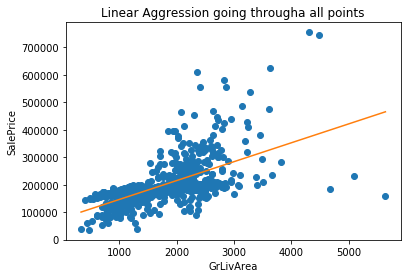

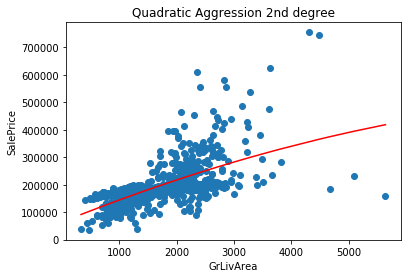

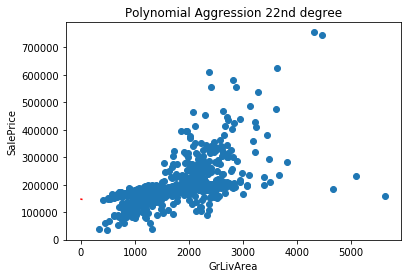

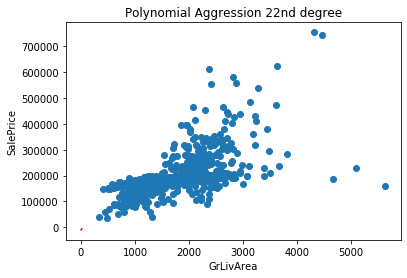

In [11]:
# We use our data here
# Notice the data has already been filtered to features with only numeric values
# Real Polynomial Regression using House_Prices.csv

# Dropping ALL duplicate values in the our data_set for X 
# (This way it's actually a function mathematically, Yeah? You can have 2 same Y values but not X values usually in math)
new_data_set.drop_duplicates(subset ="GrLivArea", 
                     keep = False, inplace = True) 

X1 = new_data_set['GrLivArea']
print(len(X1))
y1 = new_data_set['SalePrice']
print(len(y1))

from scipy.interpolate import *
p1 = polyfit(X1,y1,1)


import operator
import matplotlib.pyplot as plt
plt.scatter(X1, y1, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X1,y1), key=sort_axis)
X1, y1 = zip(*sorted_zip)
plt.plot(X1, y1, color='r')
plt.show()

p1 = polyfit(X1,y1,1)
p2 = polyfit(X1,y1,2)
p3 = polyfit(X1,y1,3)
p4 = polyfit(X1,y1,4)
p5 = polyfit(X1,y1,5)
p6 = polyfit(X1,y1,6)
p7 = polyfit(X1,y1,7)
p8 = polyfit(X1,y1,8)
p9 = polyfit(X1,y1,9)
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)
print(p7)
print(p8)
print(p9)

# Polynomial Agreesion but now only in linear form
plt.plot(X1,y1,'o')
plt.plot(X1,polyval(p1,X1))
plt.title('Linear Aggression 1st degree')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Polynomial Agression 
plt.plot(X1,y1,'o')
plt.plot(X1,polyval(p2,X1), color='r') # Quadratic
plt.title('Quadratic Aggression 2nd degree')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Third order and beyond can't be seen @.@
plt.plot(X1,y1,'o')
plt.plot(X,polyval(p3,X), color='r') # Polynomial
plt.title('Polynomial Aggression 22nd degree')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.plot(X1,y1,'o')
plt.plot(X,polyval(p4,X), color='r') # Polynomial
plt.title('Polynomial Aggression 22nd degree')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

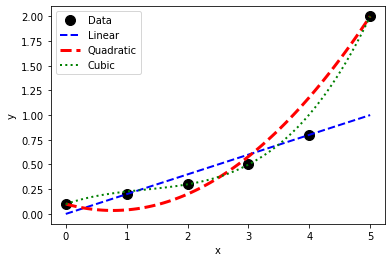

In [10]:
# from http://apmonitor.com/wiki/index.php/Main/GekkoPythonOptimization

# installing GEKKO
try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain
pipmain(['install','gekko'])

# Program starts here
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt  

xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

#### Solution
m = GEKKO()
m.options.IMODE=2
# coefficients
c = [m.FV(value=0) for i in range(4)]
x = m.Param(value=xm)
y = m.CV(value=ym)
y.FSTATUS = 1
# polynomial model
m.Equation(y==c[0]+c[1]*x+c[2]*x**2+c[3]*x**3)

# linear regression
c[0].STATUS=1
c[1].STATUS=1
m.solve(disp=False)
p1 = [c[1].value[0],c[0].value[0]]

# quadratic
c[2].STATUS=1
m.solve(disp=False)
p2 = [c[2].value[0],c[1].value[0],c[0].value[0]]

# cubic
c[3].STATUS=1
m.solve(disp=False)
p3 = [c[3].value[0],c[2].value[0],c[1].value[0],c[0].value[0]]

# plot fit
plt.plot(xm,ym,'ko',markersize=10)
xp = np.linspace(0,5,100)
plt.plot(xp,np.polyval(p1,xp),'b--',linewidth=2)
plt.plot(xp,np.polyval(p2,xp),'r--',linewidth=3)
plt.plot(xp,np.polyval(p3,xp),'g:',linewidth=2)
plt.legend(['Data','Linear','Quadratic','Cubic'],loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
# Another example from https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
